<a href="https://colab.research.google.com/github/AlejoTechEngineer/API-REST-AprendizajeAutomaticoGoogleColab/blob/main/Clase4AprendizajeAutom%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   ParCh     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB
Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.7908687943262411
El accuracy en train es: 0.8179916317991632
El accuracy en test es: 0.8252427184466019


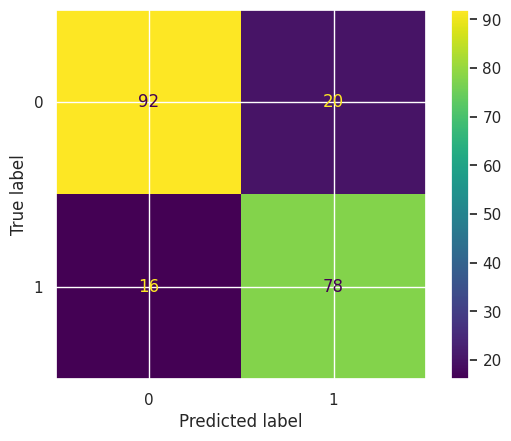

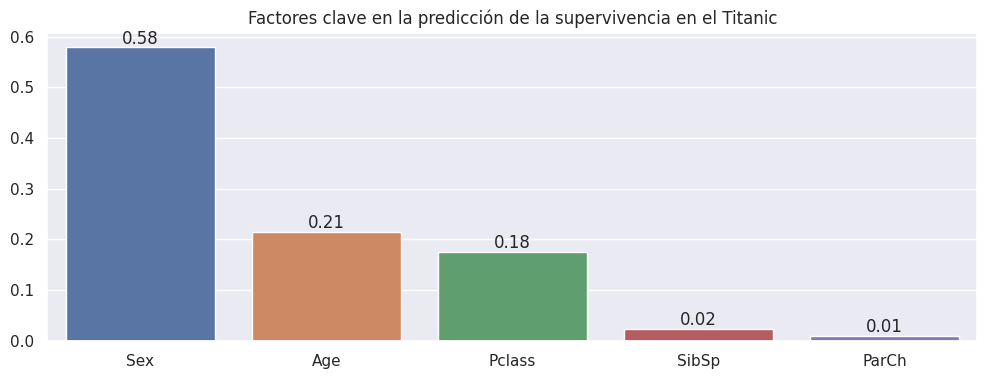

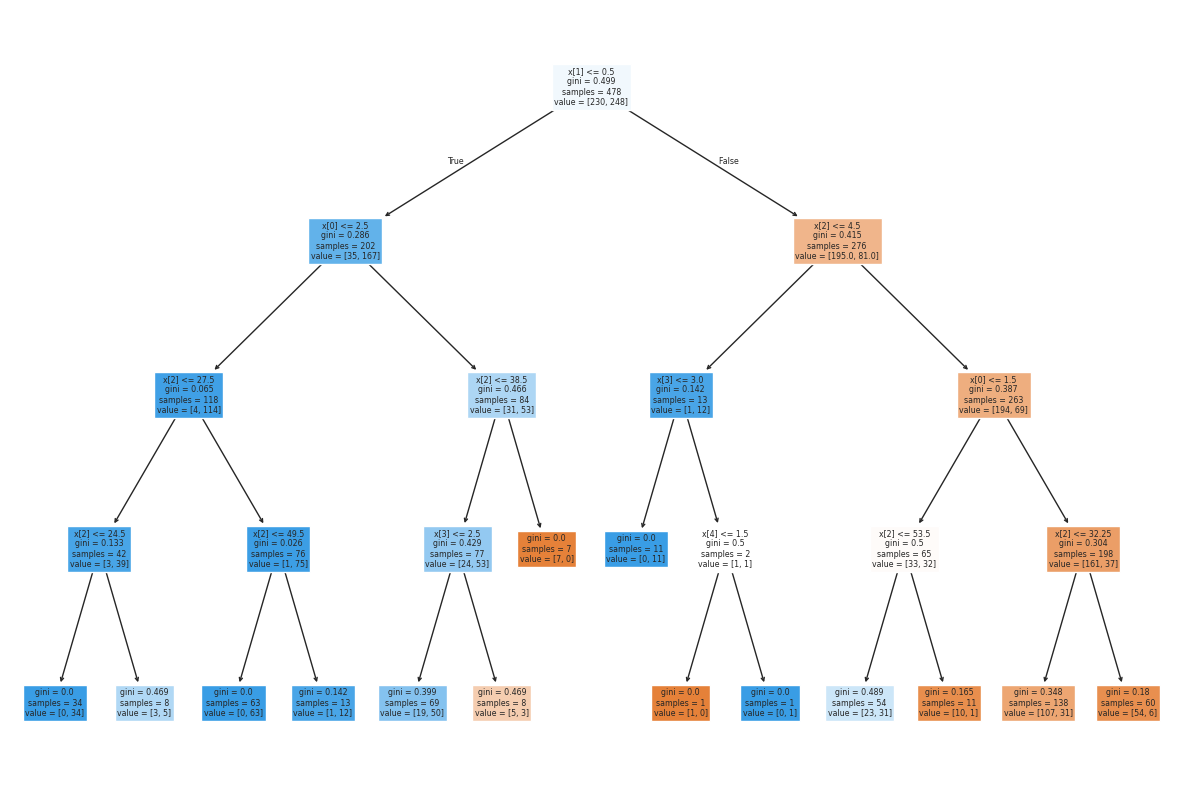

In [25]:
# Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook')

#carga del conjunto de datos
titanic = pd.read_csv('titanic.csv', sep=',')

#mirar encabezado con los datos
titanic.head(10)

# Eliminamos las columnas que no nos interesan
titanic.drop(
    ['Name', 'Fare'],
    axis=1,
    inplace=True)

#mirar encabezado con los datos sin las columnas eliminadas
titanic.head(10)

# Renombramos las columnas Siblings/Spouses Aboard	y Parents/Children Aboard por SibSp y ParCh
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh']
titanic.head()

# Analizamos el shape del objeto
titanic.shape

# Visualizamos los tipos de datos
titanic.info()

# Cambiamos los tipos de datos de Sex
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

titanic.dtypes

titanic.head()

# Renombramos columna Sex_male a Sex
titanic.rename(columns={'Sex_male':'Sex'},inplace=True)

# Ordenar colummas por nombres
titanic = titanic[['Survived','Pclass','Sex','Age','SibSp','ParCh']]
titanic

# Vemos la proporcion del a variable objetivo
titanic.Survived.value_counts(normalize=True)

# importamos libreria para balancear los datos
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

# Separamos en X e y
X_titanic = titanic.drop('Survived', axis=1)
y_titanic = titanic.Survived

# Balanceamos los datos
X_over_titanic, y_over_titanic  = undersample.fit_resample(X_titanic,y_titanic)
y_over_titanic.value_counts(normalize=True)

# Importamos las librerias para dividir el dataset
from sklearn.model_selection import train_test_split

# 30% para test y 70% para train
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_over_titanic,y_over_titanic, test_size=0.30, random_state=42)

# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_titanic, y_train_titanic)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

# Pronosticamos Y
y_train_pred_titanic = best_clf.predict(X_train_titanic)
y_test_pred_titanic = best_clf.predict(X_test_titanic)

# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test_titanic,y_test_pred_titanic,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train_titanic)
y_test_pred = best_clf.predict(X_test_titanic)

from sklearn.metrics import accuracy_score
print('El accuracy en train es:',accuracy_score(y_train_titanic,y_train_pred_titanic))
print('El accuracy en test es:', accuracy_score(y_test_titanic,y_test_pred_titanic))

feature_scores_titanic = pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train_titanic.columns).sort_values(ascending=False)).T

plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores_titanic)

for index, value in enumerate(feature_scores_titanic.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la supervivencia en el Titanic")
plt.show()

#Graficar el árbol
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(best_clf,filled=True)
plt.show()
